# Datset Visualization for Rhythmic Grouping

This notebook is scratch for investigating and visualizing our dataset(s)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from util import show_playable_audio
import os

In [3]:
base_dir = "study_v1.1_data/"
dataset = np.load(os.path.join(base_dir, "dataset/dataset.npz"))
sample_dir = os.path.join(base_dir, "samples")
x = dataset['x']
labels = dataset['labels']
sample_names = dataset['sample_names']

print(x.shape)
print(labels.shape)
print(sample_names.shape)

(15, 221, 314)
(15, 221)
(15,)


The first dimension is the different samples. The second dimension is the time steps of each sample (which don't have to be the same but currently are). The $x$ matrix has a third dimension which are the features of each time step in each sample.

In [4]:
def plot_features_and_labels(i):
    fig = plt.figure(figsize=(20,10))
    feature_ax = plt.subplot(211)
    feature_ax.imshow(x[i].T, interpolation='nearest', aspect='auto')
    feature_ax.set_ylabel("features")
    feature_ax.set_xlabel("time (frame idx)")
    feature_ax.get_yaxis().set_visible(False)
    feature_ax.set_title("features for {}".format(sample_names[i]))
    
    label_ax = plt.subplot(212, sharex=feature_ax)
    label_ax.bar(range(len(labels[i])), labels[i])
    label_ax.set_title("labels")
    
    plt.tight_layout()
    plt.show()

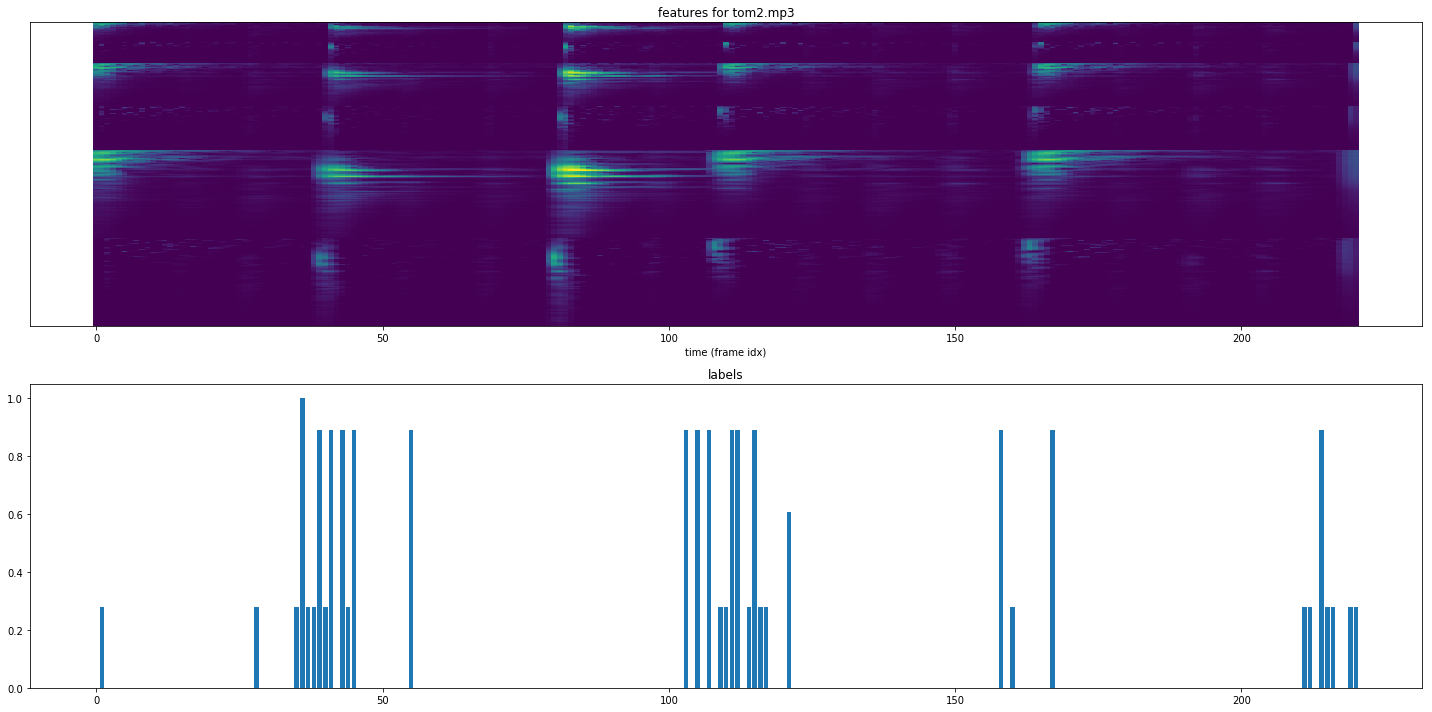

study_v1.1_data/samples/tom2.mp3


In [5]:
sample_idx = 6
plot_features_and_labels(sample_idx)
sample_path = os.path.join(sample_dir, sample_names[sample_idx])
print(sample_path)
show_playable_audio(sample_path)

In [12]:
print("Total responses: {}".format(np.count_nonzero(labels)))
print("Total Frames: {}".format(labels.size))
print("Percent of frames with non-zero labels: {}%".format(np.count_nonzero(labels) / labels.size))

Total responses: 665
Total Frames: 3315
Percent of frames with non-zero labels: 0.20060331825037708%
